In [51]:
import sys
import os
from hoomd import *
from hoomd import md
from hoomd import deprecated as hdepr
import numpy as np
import matplotlib.pyplot as plt


In [2]:
coord = np.genfromtxt('cg_coord.txt', delimiter='\t')
charge = np.genfromtxt('charge.txt')
ll = len(coord)
l_mono = len(charge)

groupA=[]
mask=charge<-1.25
for i in range(l_mono):
    if mask[i]:
        groupA.append(tuple(coord[i]))
        groupA.append(tuple(coord[i+30]))
        groupA.append(tuple(coord[i+60]))
        groupA.append(tuple(coord[i+90]))
        groupA.append(tuple(coord[i+120]))
        groupA.append(tuple(coord[i+150]))

groupB=[]
mask1 = (charge>-1.25)
mask2 = (charge<-0.75)

for i in range(l_mono):
    if (mask1[i]*mask2[i]):
        groupB.append(tuple(coord[i]))
        groupB.append(tuple(coord[i+30]))
        groupB.append(tuple(coord[i+60]))
        groupB.append(tuple(coord[i+90]))
        groupB.append(tuple(coord[i+120]))
        groupB.append(tuple(coord[i+150]))

groupC=[]
mask1 = (charge>-0.75)
mask2 = (charge<-0.25)

for i in range(l_mono):
    if (mask1[i]*mask2[i]):
        groupC.append(tuple(coord[i]))
        groupC.append(tuple(coord[i+30]))
        groupC.append(tuple(coord[i+60]))
        groupC.append(tuple(coord[i+90]))
        groupC.append(tuple(coord[i+120]))
        groupC.append(tuple(coord[i+150]))

groupD=[]
mask1 = (charge>-0.25)
mask2 = (charge<0.25)

for i in range(l_mono):
    if (mask1[i]*mask2[i]):
        groupD.append(tuple(coord[i]))
        groupD.append(tuple(coord[i+30]))
        groupD.append(tuple(coord[i+60]))
        groupD.append(tuple(coord[i+90]))
        groupD.append(tuple(coord[i+120]))
        groupD.append(tuple(coord[i+150]))

groupE=[]
mask1 = (charge>0.25)
mask2 = (charge<0.75)

for i in range(l_mono):
    if (mask1[i]*mask2[i]):
        groupE.append(tuple(coord[i]))
        groupE.append(tuple(coord[i+30]))
        groupE.append(tuple(coord[i+60]))
        groupE.append(tuple(coord[i+90]))
        groupE.append(tuple(coord[i+120]))
        groupE.append(tuple(coord[i+150]))

groupF=[]
mask1 = (charge>0.75)
mask2 = (charge<1.25)

for i in range(l_mono):
    if (mask1[i]*mask2[i]):
        groupF.append(tuple(coord[i]))
        groupF.append(tuple(coord[i+30]))
        groupF.append(tuple(coord[i+60]))
        groupF.append(tuple(coord[i+90]))
        groupF.append(tuple(coord[i+120]))
        groupF.append(tuple(coord[i+150]))


groupG=[]
mask = charge>1.25
for i in range(l_mono):
    if mask[i]:
        groupG.append(tuple(coord[i]))
        groupG.append(tuple(coord[i+30]))
        groupG.append(tuple(coord[i+60]))
        groupG.append(tuple(coord[i+90]))
        groupG.append(tuple(coord[i+120]))
        groupG.append(tuple(coord[i+150]))

hexamer=groupA+groupB+groupC+groupD+groupE+groupF+groupG
len_A = len(groupA)
len_B = len(groupB)
len_C = len(groupC)
len_D = len(groupD)
len_E = len(groupE)
len_F = len(groupF)
len_G = len(groupG)
# build the body of molecle, hexamer is a list of tuples

l_body = len(hexamer)
num_particles = len(hexamer)

In [3]:
hands_location = [[2.2749, 2.599, 1.9701],[-1.1134, 3.2696, 1.9701],[-3.3883, 0.67062, 1.9701],
[-2.2749, -2.599, 1.9701], [ 1.1134, -3.2696, 1.9701], [ 3.3883, -0.67062, 1.9701]]

In [5]:
hands_location[1][0]


-1.1134

In [9]:
coord = np.genfromtxt('cg_coord.txt', delimiter='\t')
charge = np.genfromtxt('charge.txt')
hand_A = [[2.2749, 2.599, 1.9701],[-1.1134, 3.2696, 1.9701],[-3.3883, 0.67062, 1.9701],
    [-2.2749, -2.599, 1.9701], [ 1.1134, -3.2696, 1.9701], [ 3.3883, -0.67062, 1.9701]]
z0 = 1.9701
hand_B = []
hand_B.append([hand_A[0][0], -hand_A[0][1], z0])
hand_B.append([(3*hand_A[1][0]-4*hand_A[1][1])/3.0,(-4*hand_A[1][0]-3*hand_A[1][1])/5.0, z0])

In [11]:
hand_B
range(1,5)

[1, 2, 3, 4]

In [16]:
sq3= 1/2.0 * 3**0.5
sq3

0.8660254037844386

In [20]:
coeff = [[1, sq3],[2,-sq3]]
coeff

[[1, 0.8660254037844386], [2, -0.8660254037844386]]

In [68]:
coeff = [[1,0,0,-1],[-0.5, sq3, sq3, 0.5],[-0.5, -sq3, -sq3, 0.5],[1,0,0,-1],[-0.5, sq3, sq3, 0.5],[-0.5, -sq3, -sq3, 0.5]]
hand_B = []
for i in range(6):
    hand_B.append(tuple([(coeff[i][0]*hand_A[i][0]+coeff[i][1]*hand_A[i][1]),
        (coeff[i][2]*hand_A[i][0]+coeff[i][3]*hand_A[i][1]), z0]))

In [69]:
np_handB=np.array(hand_B)
np_handA=np.array(hand_A)

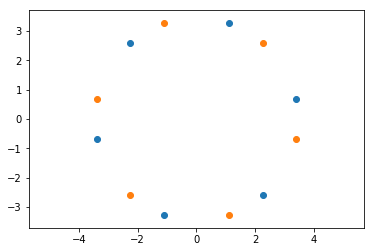

In [70]:
x=np_handB[:,0]
y=np_handB[:,1]
plt.figure()
plt.scatter(x,y)
plt.scatter(np_handA[:,0],np_handA[:,1])
plt.axis('equal')
plt.show()

In [7]:
charge_NGK=charge

In [34]:
groupA=[]
mask=charge<-1.25
for i in range(l_mono):
    if mask[i]:
        groupA.append(tuple(coord[i]))
        groupA.append(tuple(coord[i+30]))
        groupA.append(tuple(coord[i+60]))
        groupA.append(tuple(coord[i+90]))
        groupA.append(tuple(coord[i+120]))
        groupA.append(tuple(coord[i+150]))


In [36]:
groupA = groupA+hand_B
groupA

[(1.4939, 0.8657, 2.5769),
 (-0.0027682, 1.7266, 2.5769),
 (-1.4967, 0.86091, 2.5769),
 (-1.4939, -0.8657, 2.5769),
 (0.0027682, -1.7266, 2.5769),
 (1.4967, -0.86091, 2.5769),
 (2.2749, -2.599, 1.9701),
 (3.3882566602136004, 0.6705673154264061, 1.9701),
 (2.27492395628592, 3.269663875642814, 1.9701),
 (-2.2749, 2.599, 1.9701),
 (-3.3882566602136004, -0.6705673154264061, 1.9701),
 (-2.27492395628592, -3.269663875642814, 1.9701)]

In [9]:
charge_group = []
for i in range(len(charge_NGK)):
    charge_group.append(int((charge_NGK[i]+1.5)/0.5))
    

In [13]:
type(coord[1])

numpy.ndarray

In [17]:
coord_center = [(-3,0,0), (3,0,0)]

In [19]:
coord_center[1][1]

0

In [29]:
a=[[1.0,10.1,10.1]]*2

In [30]:
a

[[1.0, 10.1, 10.1], [1.0, 10.1, 10.1]]

In [22]:
type(a)

list

In [4]:
b=[[1.0, 10.1, 10.1],
   [1,1,1]]

In [5]:
b[1][1]

1

In [3]:
3**0.5/2

0.8660254037844386

In [7]:
bond_len = 0.5
bond_vector = [[bond_len,0,0],[0.5*bond_len, -0.866*bond_len,0], [-0.5*bond_len,-0.866*bond_len],
[-bond_len, 0,0],[-0.5*bond_len,0.866*bond_len,0],]

In [8]:
[2:5]

SyntaxError: invalid syntax (<ipython-input-8-dc587c043a4c>, line 1)